** https://www.kaggle.com/datasets/odins0n/monthly-gold-prices/data **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib, os

sns.set(style="whitegrid")


In [46]:
# Load dataset
df = pd.read_csv("data.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

print("Dataset shape:", df.shape)
df.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8312\1093570549.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Dataset shape: (511, 19)


,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),Saudi Arabia(SAR),Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR)
0,1979-01-31,233.7,144.8,45160.3,117.4,267.1,379.3,1840.8,NaN,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,197.2,194.5
1,1979-02-28,251.3,154.6,50209.1,124.2,295.5,413.6,2011.7,NaN,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,219.6,209.4
2,1979-03-30,240.1,148.0,50274.3,116.2,278.2,406.2,1940.2,NaN,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,214.6,202.4
3,1979-04-30,245.3,152.8,54144.6,118.8,278.5,420.0,2013.1,NaN,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,221.1,206.9
4,1979-05-31,274.6,172.0,61057.1,132.7,321.6,478.0,2253.4,NaN,NaN,933.3,171656.1,1048.4,5560.8,NaN,NaN,133889.6,250.7,233.7


In [47]:
# Extract date features
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Drop missing values if any
df.dropna(inplace=True)

# Verify
df.head()


,Date,United States(USD),Europe(EUR),Japan(JPY),United Kingdom(GBP),Canada(CAD),Switzerland(CHF),India(INR),China(CNY),Turkey(TRY),...,Indonesia(IDR),United Arab Emirates(AED),Thailand(THB),Vietnam(VND),Egypt(EGP),South Korean(KRW),Australia(AUD),South Africa(ZAR),month,year
131,1989-12-29,398.6,310.7,57287.2,247.2,461.6,614.9,6624.8,1873.5,0.9,...,715762.5,1459.4,10036.1,1800931.7,1018.4,269064.4,504.6,1015.7,12,1989
132,1990-01-31,415.1,321.3,59972.3,247.1,492.0,623.8,7041.0,1930.2,1.0,...,745400.5,1524.9,10623.3,1867170.0,1059.9,283240.8,540.0,1063.2,1,1990
133,1990-02-28,407.7,316.2,60672.5,241.2,485.7,607.9,6957.4,1936.8,1.0,...,747408.3,1496.0,10494.1,1853648.1,1085.6,282356.4,534.1,1040.4,2,1990
134,1990-03-30,368.5,283.9,57987.1,223.7,431.0,550.8,6334.4,1717.1,0.9,...,652783.7,1348.1,9506.1,1622520.2,947.3,257424.6,488.4,976.9,3,1990
135,1990-04-30,367.8,280.7,58375.7,224.3,428.3,533.9,6379.3,1739.6,0.9,...,669724.5,1341.5,9510.6,1651644.8,982.5,258294.2,488.9,975.8,4,1990


In [48]:
# Target columns (all countries except Date, month, year)
country_cols = [col for col in df.columns if col not in ['Date', 'month', 'year']]

# Prepare directory for saving models
os.makedirs("saved_models", exist_ok=True)

results = {}

for country in country_cols:
    X = df[['month', 'year']]
    y = df[country]

    # Train-test split (chronological)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    # Models
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

    # Train
    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    gbr.fit(X_train, y_train)

    # Predictions
    preds_lr = lr.predict(X_test)
    preds_rf = rf.predict(X_test)
    preds_gbr = gbr.predict(X_test)

    # Metrics
    def metrics(y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'R2': r2_score(y_true, y_pred)
        }

    res = {
        'LinearRegression': metrics(y_test, preds_lr),
        'RandomForest': metrics(y_test, preds_rf),
        'GradientBoosting': metrics(y_test, preds_gbr)
    }

    # Stacking Ensemble
    estimators = [('rf', rf), ('gbr', gbr)]
    stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())
    stack.fit(X_train, y_train)
    preds_stack = stack.predict(X_test)
    res['Stacking'] = metrics(y_test, preds_stack)

    # Save best model
    best_model_name = min(res, key=lambda k: res[k]['RMSE'])
    if best_model_name == 'LinearRegression': model_to_save = lr
    elif best_model_name == 'RandomForest': model_to_save = rf
    elif best_model_name == 'GradientBoosting': model_to_save = gbr
    else: model_to_save = stack

    joblib.dump(model_to_save, f"saved_models/{country.replace(' ', '_').replace('(', '').replace(')', '')}.joblib")

    results[country] = {m: res[m]['R2'] for m in res}
    print(f"{country}: Best model = {best_model_name}")

print("✅ Model training complete!")


United States(USD): Best model = LinearRegression
Europe(EUR): Best model = Stacking
Japan(JPY): Best model = Stacking
United Kingdom(GBP): Best model = LinearRegression
Canada(CAD): Best model = Stacking
Switzerland(CHF): Best model = LinearRegression
India(INR): Best model = Stacking
China(CNY): Best model = LinearRegression
Turkey(TRY): Best model = Stacking
Saudi Arabia(SAR): Best model = LinearRegression
Indonesia(IDR): Best model = Stacking
United Arab Emirates(AED): Best model = LinearRegression
Thailand(THB): Best model = LinearRegression
Vietnam(VND): Best model = LinearRegression
Egypt(EGP): Best model = Stacking
South Korean(KRW): Best model = LinearRegression
Australia(AUD): Best model = LinearRegression
South Africa(ZAR): Best model = Stacking
✅ Model training complete!


In [49]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)
results_df


,LinearRegression,RandomForest,GradientBoosting,Stacking
United States(USD),0.490,-0.545,-0.850,-1.282
Europe(EUR),-0.191,-1.031,-0.708,-0.113
Japan(JPY),-0.640,-0.548,-0.330,-0.040
United Kingdom(GBP),-0.332,-1.634,-1.733,-1.141
Canada(CAD),-0.759,-1.601,-1.428,-0.246
Switzerland(CHF),0.508,-0.941,-1.006,-1.011
India(INR),-0.413,-0.966,-1.060,-0.134
China(CNY),0.466,-1.047,-1.511,-2.086
Turkey(TRY),-1.179,-1.241,-1.184,-0.667
Saudi Arabia(SAR),0.490,-0.547,-0.906,-1.671


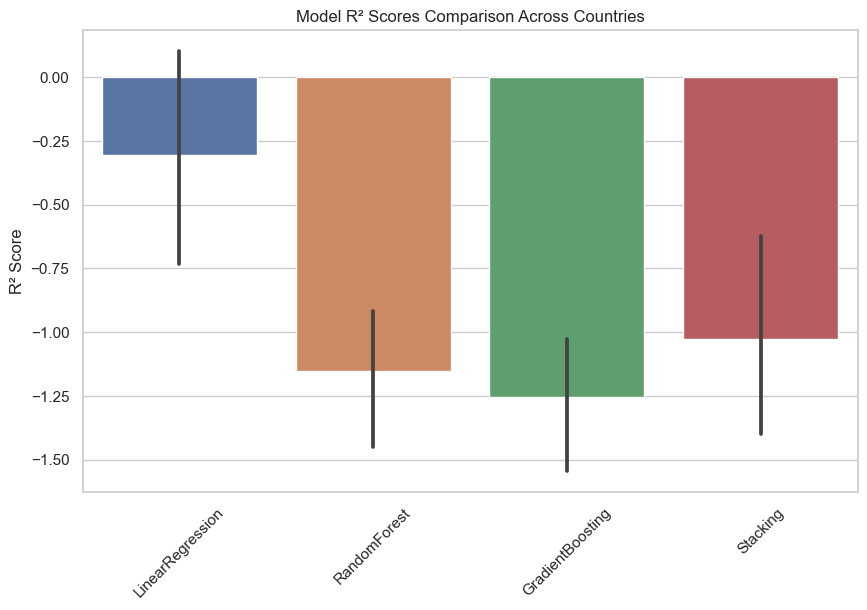

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df)
plt.title("Model R² Scores Comparison Across Countries")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


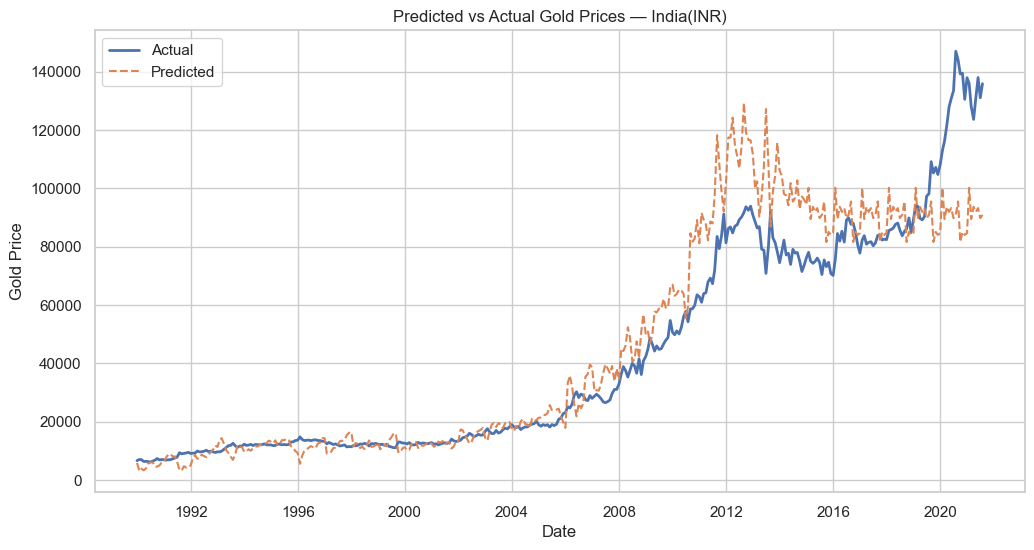

In [51]:
country = 'India(INR)'
model_path = f"saved_models/{country.replace(' ', '_').replace('(', '').replace(')', '')}.joblib"
model = joblib.load(model_path)

X = df[['month', 'year']]
y_true = df[country]
y_pred = model.predict(X)

plt.figure(figsize=(12,6))
plt.plot(df['Date'], y_true, label='Actual', linewidth=2)
plt.plot(df['Date'], y_pred, label='Predicted', linestyle='--')
plt.title(f"Predicted vs Actual Gold Prices — {country}")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import joblib
import numpy as np
import pandas as pd

# --- Best models per country ---
best_models = {
    'United_StatesUSD': 'LinearRegression',
    'EuropeEUR': 'Stacking',
    'JapanJPY': 'Stacking',
    'United_KingdomGBP': 'LinearRegression',
    'CanadaCAD': 'Stacking',
    'SwitzerlandCHF': 'LinearRegression',
    'IndiaINR': 'Stacking',
    'ChinaCNY': 'LinearRegression',
    'TurkeyTRY': 'Stacking',
    'Saudi_ArabiaSAR': 'LinearRegression',
    'IndonesiaIDR': 'Stacking',
    'United_Arab_EmiratesAED': 'LinearRegression',
    'ThailandTHB': 'LinearRegression',
    'VietnamVND': 'LinearRegression',
    'EgyptEGP': 'Stacking',
    'South_KoreanKRW': 'LinearRegression',
    'AustraliaAUD': 'LinearRegression',
    'South_AfricaZAR': 'Stacking'
}

# --- Load all models ---
models = {}
for country in best_models.keys():
    models[country] = joblib.load(f"saved_models/{country}.joblib")
print("✅ All best models loaded!")

# --- Tkinter App ---
def predict():
    country = country_var.get()
    day = day_entry.get().strip()
    month = month_entry.get().strip()
    year = year_entry.get().strip()

    if not country or not day or not month or not year:
        messagebox.showerror("Input Error", "Please fill all fields.")
        return

    try:
        dt = pd.to_datetime(f"{year}-{month}-{day}")
        X_predict = np.array([[dt.month, dt.year]])
        pred = models[country].predict(X_predict)[0]
        result_label.config(text=f"Predicted Gold Price for {country} on {dt.date()}: {pred:.2f}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# --- GUI layout ---
root = tk.Tk()
root.title("Gold Price Predictor")
root.geometry("400x300")

tk.Label(root, text="Select Country:").pack(pady=5)
country_var = tk.StringVar()
country_dropdown = ttk.Combobox(root, textvariable=country_var, values=list(best_models.keys()))
country_dropdown.pack(pady=5)
country_dropdown.current(0)

tk.Label(root, text="Day (DD):").pack(pady=5)
day_entry = tk.Entry(root)
day_entry.pack(pady=5)

tk.Label(root, text="Month (MM):").pack(pady=5)
month_entry = tk.Entry(root)
month_entry.pack(pady=5)

tk.Label(root, text="Year (YYYY):").pack(pady=5)
year_entry = tk.Entry(root)
year_entry.pack(pady=5)

tk.Button(root, text="Predict Gold Price", command=predict, bg="gold").pack(pady=15)

result_label = tk.Label(root, text="", font=("Arial", 12), fg="blue")
result_label.pack(pady=10)

root.mainloop()


✅ All best models loaded!


c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid 

✅ All best models loaded!


In [55]:
!pip install inquirer
